# Network Deliberation ABM
## Discrete state, generated signal task

In [35]:
# Imports
import configparser
import math

import numpy as np
import repsci

In [36]:
# Configuration
reproduce = '2020-10-07 112527 d441939'
experiment = repsci.Experiment(
    "discrete_generated",
    reproduce=reproduce)
config = experiment.get_config()

N = config.getint('abm', 'N')
M = config.getint('abm', 'M')
runs = config.getint('abm', 'runs')
stages = config.getint('abm', 'stages')
steps = config.getint('abm', 'steps')

bit_count = config.getint('abm', 'bit_count')
p_error = config.getfloat('abm', 'p_error')

small_world_k = config.getint('networks', 'small_world_k')
small_world_a = config.getfloat('networks', 'small_world_a')
barabasi_albert_m = config.getint('networks', 'barabasi_albert_m')

# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (20, 20)})

all_networks = [
    'Complete',
    'Lattice',
    'Pref. Attach.',
    'Small World',
    'Long Path',
    'Random Group']
networks = [
    v for v in all_networks
    if v in config.get('networks', 'enabled').split(',')]

all_learning_strategies = [
    'Best Neighbor',
    'Conform',
    'Local Majority']
learning_strategies = [
    v for v in all_learning_strategies
    if v in config.get('strategies', 'enabled').split(',')]

num_net = len(networks)
num_strat = len(learning_strategies)

In [37]:
score_fraction = np.load(experiment.get_filename('score_fraction.npy'))
score_distance = np.load(experiment.get_filename('score_distance.npy'))

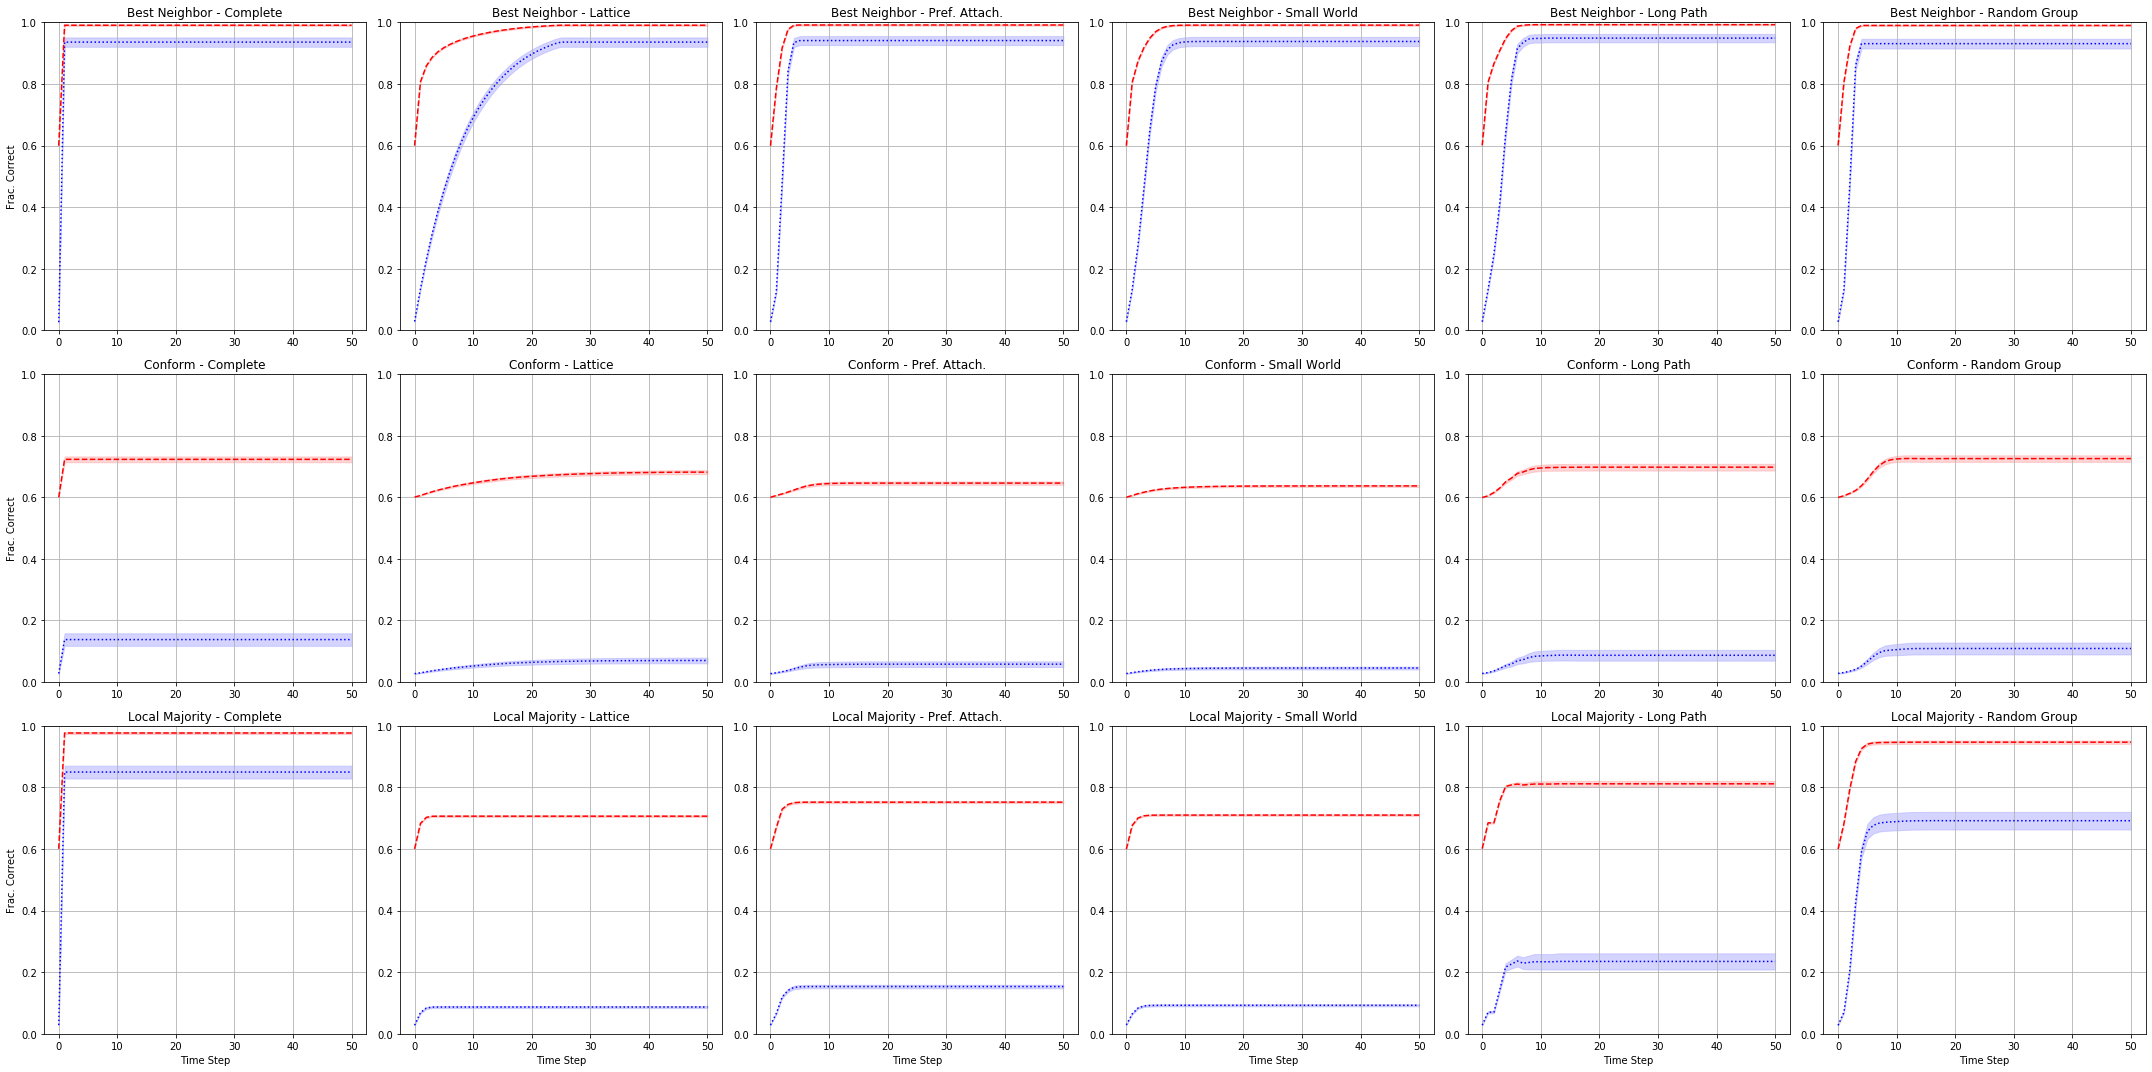

In [38]:
plt.figure(figsize=(30, 15))
for i, title in enumerate(learning_strategies):
    for j, title2 in enumerate(networks):
        plt.subplot(num_strat, num_net, 1 + i * num_net + j)

        y = score_fraction[i][j][0]
        x = range(len(y))
        err95 = 1.96 * np.array(score_fraction[i][j][1]) / math.sqrt(runs)
        plt.fill_between(x, y - err95, y + err95, color="#aaaaff7f")
        plt.plot(x, y, 'b:')

        y = score_distance[i][j][0]
        err95 = 1.96 * np.array(score_distance[i][j][1]) / math.sqrt(runs)
        plt.fill_between(x, y - err95, y + err95, color="#ffaaaa7f")
        plt.plot(x, y, 'r--')     

        plt.title(f'{title} - {title2}')
        if j == 0:
            plt.ylabel('Frac. Correct')
        if i == 2:
            plt.xlabel('Time Step')
        plt.grid(True)
        plt.tight_layout()
        plt.ylim([0, 1])

out = experiment.get_filename('plot.png')
plt.savefig(out, dpi=300)

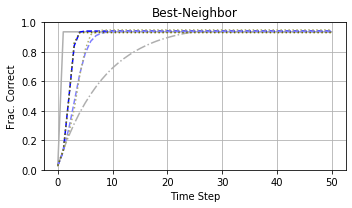

In [39]:
plt.figure(figsize=(5,3))
plt.plot(score_fraction[0][0][0], '-', color='#afafaf', label='Complete')
plt.plot(score_fraction[0][1][0], '-.', color='#afafaf', label='Lattice')
plt.plot(score_fraction[0][2][0], '--', color='#0000ff', label='Pref. Attach.')
plt.plot(score_fraction[0][3][0], '--', color='#7f7fff', label='Small World')
plt.plot(score_fraction[0][4][0], ':', color='#afaf6f', label='ND: Long Path')
plt.plot(score_fraction[0][5][0], ':', color='#6f6f00', label='ND: Random Group')
plt.grid()
#plt.legend()
plt.ylim([0,1])
plt.ylabel('Frac. Correct')
plt.xlabel('Time Step')
plt.title('Best-Neighbor')
plt.tight_layout()
out = experiment.get_filename('best-neighbor-fraction.png')
plt.savefig(out, dpi=600)

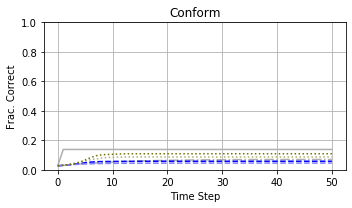

In [40]:
plt.figure(figsize=(5,3))
plt.plot(score_fraction[1][0][0], '-', color='#afafaf', label='Complete')
plt.plot(score_fraction[1][1][0], '-.', color='#afafaf', label='Lattice')
plt.plot(score_fraction[1][2][0], '--', color='#0000ff', label='Pref. Attach.')
plt.plot(score_fraction[1][3][0], '--', color='#7f7fff', label='Small World')
plt.plot(score_fraction[1][4][0], ':', color='#afaf6f', label='ND: Long Path')
plt.plot(score_fraction[1][5][0], ':', color='#6f6f00', label='ND: Random Group')
plt.grid()
#plt.legend()
plt.title('Conform')
plt.ylabel('Frac. Correct')
plt.xlabel('Time Step')
plt.ylim([0,1])
plt.tight_layout()
out = experiment.get_filename('conform-fraction.png')
plt.savefig(out, dpi=600)

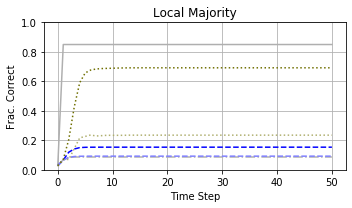

In [41]:
plt.figure(figsize=(5,3))
plt.plot(score_fraction[2][0][0], '-', color='#afafaf', label='Complete')
plt.plot(score_fraction[2][1][0], '-.', color='#afafaf', label='Lattice')
plt.plot(score_fraction[2][2][0], '--', color='#0000ff', label='Pref. Attach.')
plt.plot(score_fraction[2][3][0], '--', color='#7f7fff', label='Small World')
plt.plot(score_fraction[2][4][0], ':', color='#afaf6f', label='ND: Long Path')
plt.plot(score_fraction[2][5][0], ':', color='#6f6f00', label='ND: Random Group')
plt.grid()
#plt.legend(bbox_to_anchor=(0,0.4, 1, 1), loc="lower right")
plt.title('Local Majority')
plt.ylabel('Frac. Correct')
plt.xlabel('Time Step')
plt.ylim([0,1])
plt.tight_layout()
out = experiment.get_filename('local-majority-fraction.png')
plt.savefig(out, dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


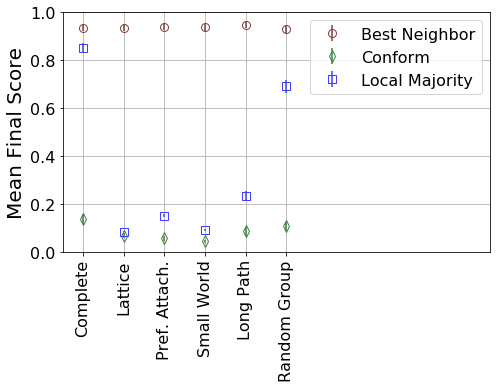

In [42]:
symbols = ['o','d','s']
colors = ['#7f3f3f', '#3f7f3f', '#3f3fff']
plt.figure(figsize=(7,5.5))
exclude = ['Random', 'StochasticBlock']
for i, title in enumerate(learning_strategies):
    xlabels = []
    ys = []
    err95s = []
    for j, title2 in enumerate(networks):
        if title2 in exclude:
            continue
        xlabels.append(title2)
        y = score_fraction[i][j][0]
        best = max(y)
        ys.append(best)
        converge_threshold = 0.99 * best
        converge_time = None
        for t, y_t in enumerate(y):
            if y_t >= converge_threshold:
                converge_time = t
                break
        err95 = 1.96 * np.array(score_fraction[i][j][1]) / math.sqrt(runs)
        err95s.append(err95[t])
    plt.errorbar(range(len(xlabels)), ys, yerr=err95s, fmt='{}'.format(symbols[i]), markerfacecolor='{}00'.format(colors[i]), color=colors[i], markeredgecolor='{}ff'.format(colors[i]), label=title, markersize=8)
    plt.ylim([0, 1])
    plt.xlim([-0.5, 10])
    plt.grid(True)
    plt.xticks(ticks=range(len(xlabels)), labels=xlabels, rotation=90, fontsize=16)
    plt.yticks(fontsize=16)

plt.ylabel('Mean Final Score', fontsize=20)
plt.legend(loc='upper right',fontsize=16)
plt.tight_layout()
out = experiment.get_filename('performance.png')
plt.savefig(out, dpi=600)
plt.savefig(experiment.get_filename('performance.eps'), dpi=600)
